In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from  tensorflow.keras.preprocessing import image
import pandas as ps
import numpy as np

In [2]:
img_size = [64,64,3]

In [3]:
train = 'training_set/training_set/'
test ='test_set/test_set/'


# DATA AUGMENTATION

In [4]:
train_datagen = ImageDataGenerator(shear_range=0.5,
                                  rescale=1./255,
                                  horizontal_flip=False,
                                  zoom_range=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# target_size is same as initilized image_size
training_set = train_datagen.flow_from_directory(train,target_size=(64,64),batch_size=20,
                                                class_mode='categorical')

Found 8005 images belonging to 2 classes.


In [6]:
# target_size is same as initilized image_size
testing_set = test_datagen.flow_from_directory(test,target_size=(64,64),batch_size=20,
                                                class_mode='categorical')

Found 2023 images belonging to 2 classes.


In [7]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

# DEFINE A MODEL

In [34]:
model = keras.Sequential([
    keras.layers.Conv2D(32,kernel_size = 3, input_shape=[64,64,3]),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(64,kernel_size = 3),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(128,kernel_size = 3),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(256,kernel_size = 3),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(2,activation='softmax')
    
    
])

In [35]:
model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics=['accuracy'])
batch_size=32,

# TRAIN MODEL

In [36]:
model.fit(training_set,validation_data=testing_set,
         steps_per_epoch=len(testing_set),
         epochs=30,
         validation_steps=len(testing_set))

Epoch 1/30
102/102 [==============================] - 40s 388ms/step - loss: 0.7088 - accuracy: 0.5152 - val_loss: 0.6916 - val_accuracy: 0.5007
Epoch 2/30
102/102 [==============================] - 26s 251ms/step - loss: 0.6979 - accuracy: 0.5333 - val_loss: 0.7025 - val_accuracy: 0.5433
Epoch 3/30
102/102 [==============================] - 24s 237ms/step - loss: 0.6914 - accuracy: 0.5461 - val_loss: 0.6643 - val_accuracy: 0.6065
Epoch 4/30
102/102 [==============================] - 23s 225ms/step - loss: 0.6804 - accuracy: 0.5706 - val_loss: 0.6386 - val_accuracy: 0.6416
Epoch 5/30
102/102 [==============================] - 23s 225ms/step - loss: 0.6556 - accuracy: 0.6078 - val_loss: 0.6355 - val_accuracy: 0.6253
Epoch 6/30
102/102 [==============================] - 23s 221ms/step - loss: 0.6566 - accuracy: 0.6294 - val_loss: 0.7074 - val_accuracy: 0.5868
Epoch 7/30
102/102 [==============================] - 22s 212ms/step - loss: 0.6497 - accuracy: 0.6157 - val_loss: 0.6113 - val_ac

# SAVE MODEL

In [38]:
model.save('Cat_Dog_classifier.h5')

# LOAD MODEL

In [42]:
model1 = keras.models.load_model("Cat_Dog_classifier.h5")

# Testing the image

In [43]:
img_path = 'test_set/test_set/cats/cat.4004.jpg'

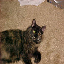

In [45]:
img = image.load_img(img_path,target_size=(64,64))
img

In [54]:
x =image.img_to_array(img)
x = x/255
x =np.expand_dims(x,axis=0)
pred = np.argmax(model1.predict(x)[0],axis=0)

if pred ==1:
    print('DOG')
else:
        print("CAT")

CAT
